<a href="https://colab.research.google.com/github/cielcs/Bayesian-inference/blob/main/MFCC%E3%81%A8%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 必要なライブラリをインストール

In [ ]:
pip install librosa numpy

### mfcc

In [ ]:
import librosa
import numpy as np

sound_path = '/content/drive/MyDrive/naist/Bsound/'

def extract_mfcc(wav_file, n_mfcc=13):
    # Load the WAV file
    y, sr = librosa.load(wav_file, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose the MFCCs to have time steps in rows and coefficients in columns
    mfccs = mfccs.T
    mfcc_mean = np.mean(mfccs, axis=0)
    mfcc_std = np.std(mfccs, axis=0)
    return mfcc_mean, mfcc_std

# Example usage
wav_file = sound_path + '5_29_1447.wav'  # Replace with your WAV file path
mfcc_mean_list = []
mfcc_std_list = []
mfcc_mean, mfcc_std = extract_mfcc(wav_file)
mfcc_mean_list.append(mfcc_mean)
mfcc_std_list.append(mfcc_std)
scaler_mean = StandardScaler()
scaler_std = StandardScaler()
mfcc_mean_normalized = scaler_mean.fit_transform(np.array(mfcc_mean_list))
mfcc_std_normalized = scaler_std.fit_transform(np.array(mfcc_std_list))
mfcc_features_normalized = np.concatenate((mfcc_mean_normalized, mfcc_std_normalized), axis=1)
print(mfcc_mean)
print(mfcc_std)


[-838.7781     170.76062     64.31062     11.991164    19.38516
   24.630083     6.9358234   -2.3785737    9.3261795   19.81998
   16.687416    11.044291    10.134974 ]
[17.61942   14.012062   6.540339   7.7444134  5.625059   3.4928298
  3.47011    4.7729297  3.3348742  2.88399    3.682071   3.7111802
  3.322581 ]


### ディレクトリ内の全ての音声データに対してmfccを求め、主成分分析する

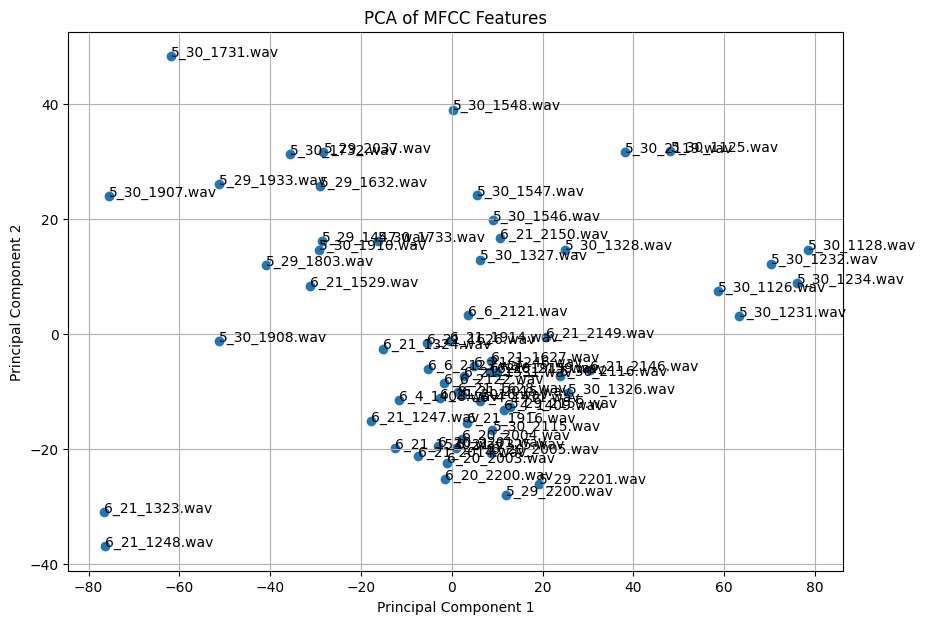

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # 平均を取って特徴量を固定長にする
    return mfccs

def process_directory(directory):
    mfcc_list = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(filename)

    return np.array(mfcc_list), labels

# MFCCを抽出
mfcc_features, labels = process_directory(directory)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1])

for i, label in enumerate(labels):
    plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.show()


### 色を時間に合わせてグラデーション変化

[[ 1.27489674e+00  1.14040482e+00  1.16796422e+00  1.15296729e-01
   3.69671509e-02  6.71925485e-01  9.70071614e-01  3.00667316e-01
  -3.63500059e-01 -3.75164419e-01 -8.22943091e-01 -1.87779939e+00
  -2.12015676e+00  2.93526649e-01 -3.56178582e-01 -3.48972529e-01
   6.80420101e-01 -6.34854019e-01 -8.70418906e-01 -6.01299405e-01
   3.52171287e-02  7.75473654e-01  3.81885797e-01 -5.24662256e-01
  -5.93153477e-01 -8.74504983e-01]
 [ 1.57982254e+00  1.51106262e+00  1.31341827e+00 -2.91552246e-01
  -9.64184284e-01 -8.67120147e-01 -1.09684360e+00 -1.22878146e+00
   9.95070636e-02  1.56749153e+00  8.36870372e-01 -9.77714598e-01
  -1.33224225e+00  4.47411478e-01 -6.04946688e-02 -6.92422450e-01
   1.30920649e+00 -3.22863311e-02 -7.29964614e-01 -6.68295801e-01
   5.86575687e-01 -5.23241699e-01  1.50960326e-01 -1.81997210e-01
  -6.19586967e-02 -3.75024945e-01]
 [ 8.41731071e-01  1.60039496e+00  5.09145081e-01 -1.38060665e+00
  -1.58987057e+00 -6.94259942e-01 -5.25046065e-02  5.39110363e-01
   9.4

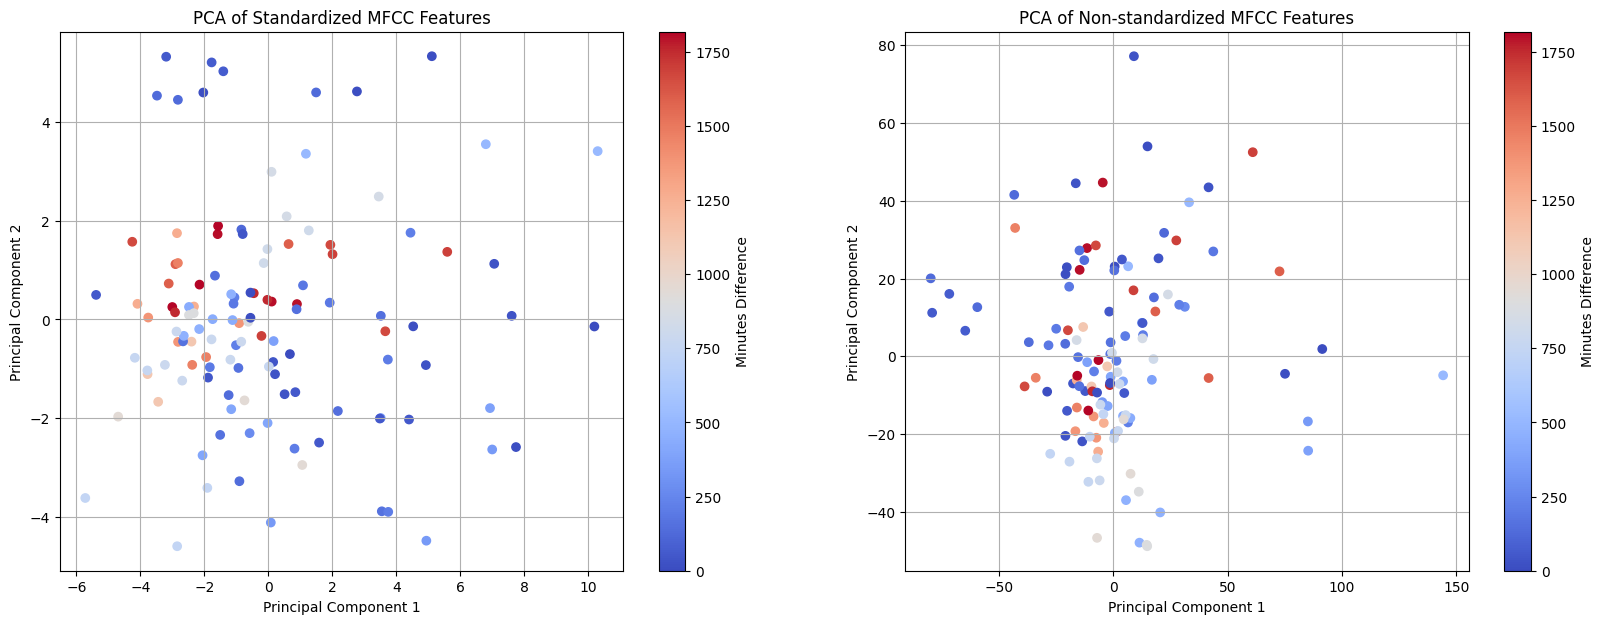

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors
np.set_printoptions(threshold=np.inf)

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132','7_3_1833','7_4_1049','7_5_0306']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc_features(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfccs.T, axis=0)
    mfcc_std = np.std(mfccs.T, axis=0)
    return np.concatenate((mfcc_mean, mfcc_std))

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc_features(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap, file_infos

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap, file_infos = process_directory(directory, specified_times)

# データの標準化
scaler = StandardScaler()
mfcc_features_normalized = scaler.fit_transform(mfcc_features)
print(mfcc_features_normalized)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca_normalized = pca.fit_transform(mfcc_features_normalized)

# PCAを標準化しないMFCCに対して実行
pca_non_standardized = PCA(n_components=2)
mfcc_pca_non_standardized = pca_non_standardized.fit_transform(mfcc_features)

# プロット
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# 標準化したデータのプロット
axs[0].scatter(mfcc_pca_normalized[:, 0], mfcc_pca_normalized[:, 1], c=colors)
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].set_title('PCA of Standardized MFCC Features')
axs[0].grid(True)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[0], label='Minutes Difference')

# 標準化しないデータのプロット
axs[1].scatter(mfcc_pca_non_standardized[:, 0], mfcc_pca_non_standardized[:, 1], c=colors)
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title('PCA of Non-standardized MFCC Features')
axs[1].grid(True)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[1], label='Minutes Difference')

plt.show()


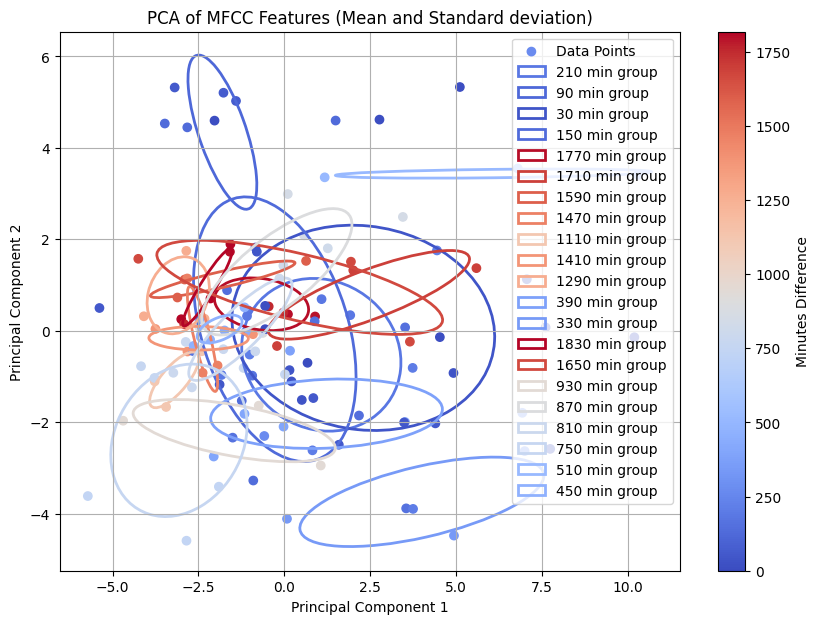

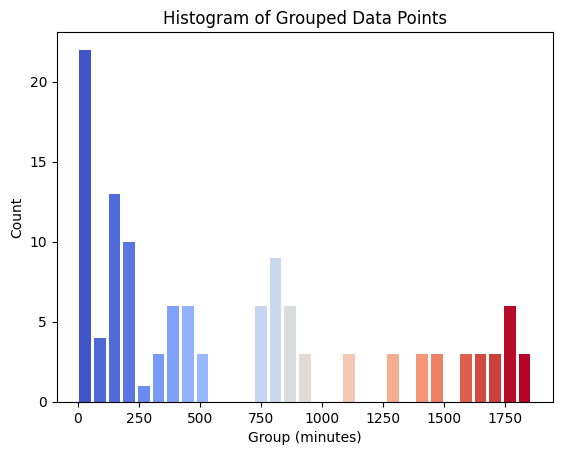

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132','7_3_1833','7_4_1049','7_5_0306']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc_features(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfccs.T, axis=0)
    mfcc_var = np.std(mfccs.T, axis=0)
    return np.concatenate((mfcc_mean, mfcc_var))

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc_features(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap, file_infos

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap, file_infos = process_directory(directory, specified_times)

# データの標準化
scaler = StandardScaler()
mfcc_features_normalized = scaler.fit_transform(mfcc_features)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features_normalized)
# mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
fig, ax = plt.subplots(figsize=(10, 7))
sc = ax.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors, label='Data Points')

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of MFCC Features (Mean and Standard deviation)')
ax.grid(True)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Minutes Difference')

# グループ化と正規分布のプロット
interval = 60  # 分
grouped_data = {}
group_colors = {}

for i, (label, minutes_difference) in enumerate(file_infos):
    if minutes_difference is not None:
        group_key = (minutes_difference // interval) * interval + interval // 2
        if group_key not in grouped_data:
            grouped_data[group_key] = []
            group_colors[group_key] = colors[i]  # グループの色を設定
        grouped_data[group_key].append(mfcc_pca[i])

for group_key, data_points in grouped_data.items():
    if len(data_points) > 1:
        data_points = np.array(data_points)
        mean_group = np.mean(data_points, axis=0)
        cov_group = np.cov(data_points, rowvar=False)

        # 共分散行列から楕円の主軸の長さと角度を計算
        eigvals, eigvecs = np.linalg.eigh(cov_group)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

        # 標準偏差1倍の範囲の楕円をプロット
        ell_radius_x = np.sqrt(eigvals[0])
        ell_radius_y = np.sqrt(eigvals[1])
        ellipse = Ellipse(mean_group, width=ell_radius_x * 2, height=ell_radius_y * 2, angle=angle, edgecolor=group_colors[group_key], fc='None', lw=2, label=f'{group_key} min group')
        ax.add_patch(ellipse)

plt.legend()

# ヒストグラムのプロット
group_counts = {key: len(value) for key, value in grouped_data.items()}
fig, ax = plt.subplots()
ax.bar(group_counts.keys(), group_counts.values(), width=interval*0.8, color=[group_colors[key] for key in group_counts.keys()])
ax.set_xlabel('Group (minutes)')
ax.set_ylabel('Count')
ax.set_title('Histogram of Grouped Data Points')
plt.show()


[[ 1.27489674e+00  1.14040482e+00  1.16796422e+00  1.15296729e-01
   3.69671509e-02  6.71925485e-01  9.70071614e-01  3.00667316e-01
  -3.63500059e-01 -3.75164419e-01 -8.22943091e-01 -1.87779939e+00
  -2.12015676e+00  2.93526649e-01 -3.56178582e-01 -3.48972529e-01
   6.80420101e-01 -6.34854019e-01 -8.70418906e-01 -6.01299405e-01
   3.52171287e-02  7.75473654e-01  3.81885797e-01 -5.24662256e-01
  -5.93153477e-01 -8.74504983e-01]
 [ 1.57982254e+00  1.51106262e+00  1.31341827e+00 -2.91552246e-01
  -9.64184284e-01 -8.67120147e-01 -1.09684360e+00 -1.22878146e+00
   9.95070636e-02  1.56749153e+00  8.36870372e-01 -9.77714598e-01
  -1.33224225e+00  4.47411478e-01 -6.04946688e-02 -6.92422450e-01
   1.30920649e+00 -3.22863311e-02 -7.29964614e-01 -6.68295801e-01
   5.86575687e-01 -5.23241699e-01  1.50960326e-01 -1.81997210e-01
  -6.19586967e-02 -3.75024945e-01]
 [ 8.41731071e-01  1.60039496e+00  5.09145081e-01 -1.38060665e+00
  -1.58987057e+00 -6.94259942e-01 -5.25046065e-02  5.39110363e-01
   9.4

<ipython-input-26-d8c3075c16ec>:101: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


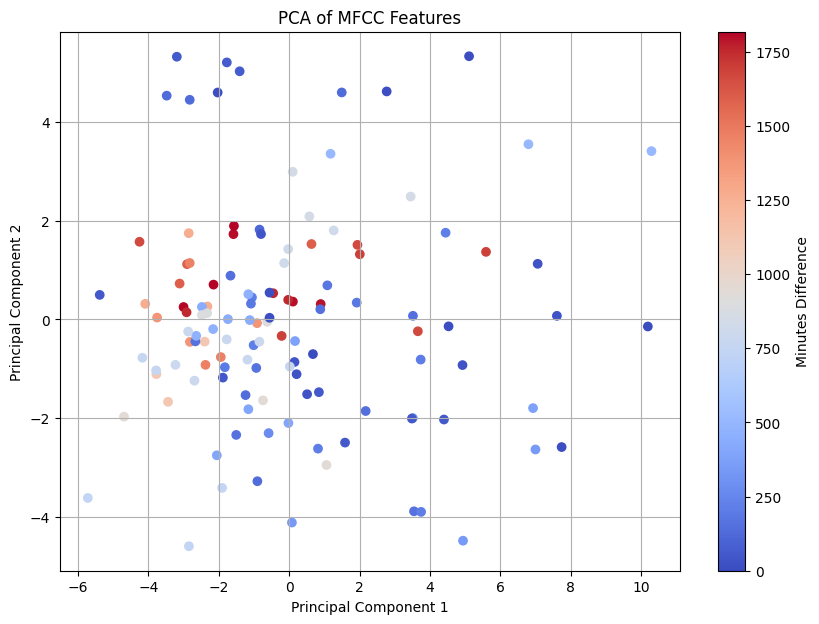

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132','7_3_1833','7_4_1049','7_5_0306']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc_features(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfccs.T, axis=0)
    mfcc_std = np.std(mfccs.T, axis=0)
    return mfcc_mean, mfcc_std

def process_directory(directory, specified_times):
    mfcc_mean_list = []
    mfcc_var_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfcc_mean, mfcc_var = extract_mfcc_features(file_path)
            mfcc_mean_list.append(mfcc_mean)
            mfcc_var_list.append(mfcc_var)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 各特徴量をフレームごとに標準化
    scaler_mean = StandardScaler()
    scaler_std = StandardScaler()
    mfcc_mean_normalized = scaler_mean.fit_transform(np.array(mfcc_mean_list))
    mfcc_std_normalized = scaler_std.fit_transform(np.array(mfcc_var_list))

    # 平均と標準偏差を結合
    mfcc_features_normalized = np.concatenate((mfcc_mean_normalized, mfcc_std_normalized), axis=1)
    print(mfcc_features_normalized)

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.cm.coolwarm  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return mfcc_features_normalized, labels, colors, norm, cmap, file_infos

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap, file_infos = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca_normalized = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca_normalized[:, 0], mfcc_pca_normalized[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')

plt.show()


MFCCフレーム結合

<ipython-input-11-7c302ca8d748>:91: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


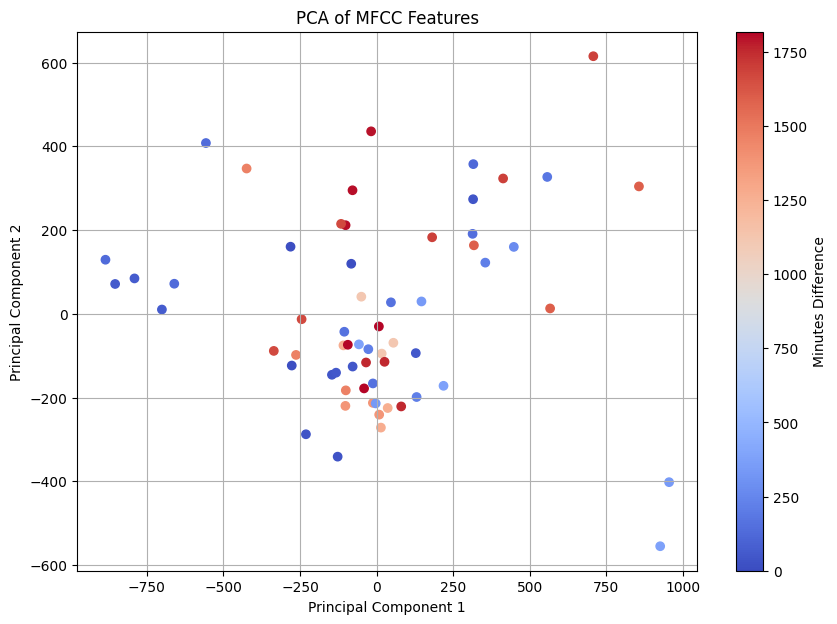

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T.flatten()  # フレームごとのMFCCを結合して1次元ベクトルに変換

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors)

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')
plt.show()


<ipython-input-4-70a46aceb5af>:101: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


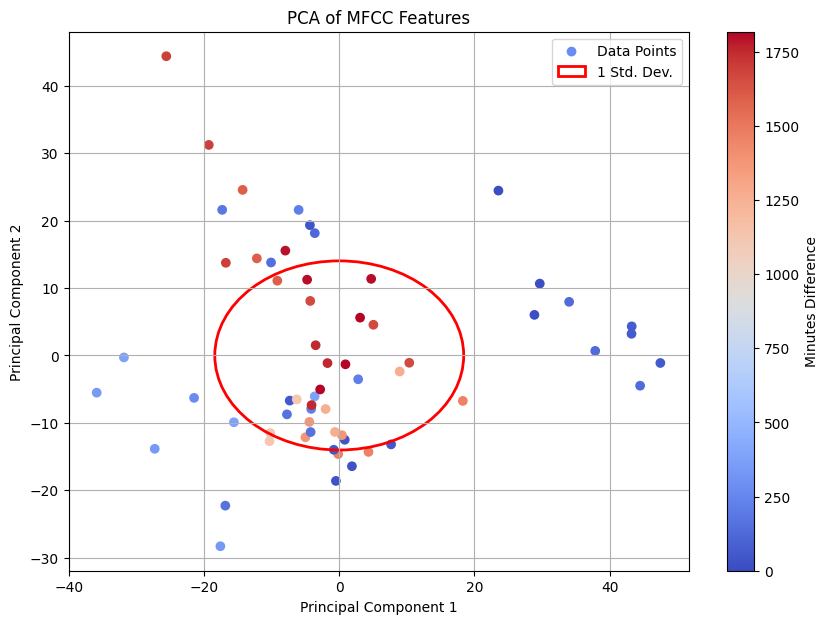

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T.flatten()  # フレームごとのMFCCを結合して1次元ベクトルに変換

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap = process_directory(directory, specified_times)

# データの標準化
scaler = StandardScaler()
mfcc_features_normalized = scaler.fit_transform(mfcc_features)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features_normalized)

# PCA後のデータ点に正規分布をフィッティング
mean_pca = np.mean(mfcc_pca, axis=0)
cov_pca = np.cov(mfcc_pca, rowvar=False)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors, label='Data Points')

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')

# 共分散行列から楕円の主軸の長さと角度を計算
eigvals, eigvecs = np.linalg.eigh(cov_pca)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]
angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

# 標準偏差1倍の範囲の楕円をプロット
ell_radius_x = np.sqrt(eigvals[0])
ell_radius_y = np.sqrt(eigvals[1])
ellipse = Ellipse(mean_pca, width=ell_radius_x * 2, height=ell_radius_y * 2, angle=angle, edgecolor='red', fc='None', lw=2, label='1 Std. Dev.')
plt.gca().add_patch(ellipse)

plt.legend()
plt.show()


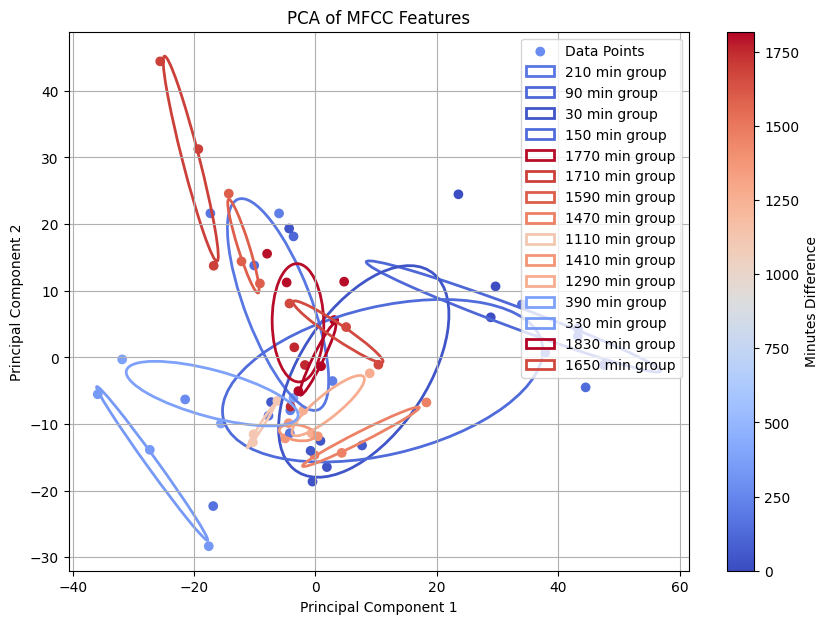

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T.flatten()  # フレームごとのMFCCを結合して1次元ベクトルに変換

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return np.array(mfcc_list), labels, colors, norm, cmap, file_infos

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap, file_infos = process_directory(directory, specified_times)

# データの標準化
scaler = StandardScaler()
mfcc_features_normalized = scaler.fit_transform(mfcc_features)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features_normalized)

# プロット
fig, ax = plt.subplots(figsize=(10, 7))
sc = ax.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors, label='Data Points')

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of MFCC Features')
ax.grid(True)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Minutes Difference')

# グループ化と正規分布のプロット
interval = 60  # 分
grouped_data = {}
group_colors = {}

for i, (label, minutes_difference) in enumerate(file_infos):
    if minutes_difference is not None:
        group_key = (minutes_difference // interval) * interval + interval // 2
        if group_key not in grouped_data:
            grouped_data[group_key] = []
            group_colors[group_key] = colors[i]  # グループの色を設定
        grouped_data[group_key].append(mfcc_pca[i])

for group_key, data_points in grouped_data.items():
    if len(data_points) > 1:
        data_points = np.array(data_points)
        mean_group = np.mean(data_points, axis=0)
        cov_group = np.cov(data_points, rowvar=False)

        # 共分散行列から楕円の主軸の長さと角度を計算
        eigvals, eigvecs = np.linalg.eigh(cov_group)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

        # 標準偏差1倍の範囲の楕円をプロット
        ell_radius_x = np.sqrt(eigvals[0])
        ell_radius_y = np.sqrt(eigvals[1])
        ellipse = Ellipse(mean_group, width=ell_radius_x * 2, height=ell_radius_y * 2, angle=angle, edgecolor=group_colors[group_key], fc='None', lw=2, label=f'{group_key} min group')
        ax.add_patch(ellipse)

plt.legend()
plt.show()


-----------------------------------------------------------

<ipython-input-14-99d5e945ce6b>:94: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


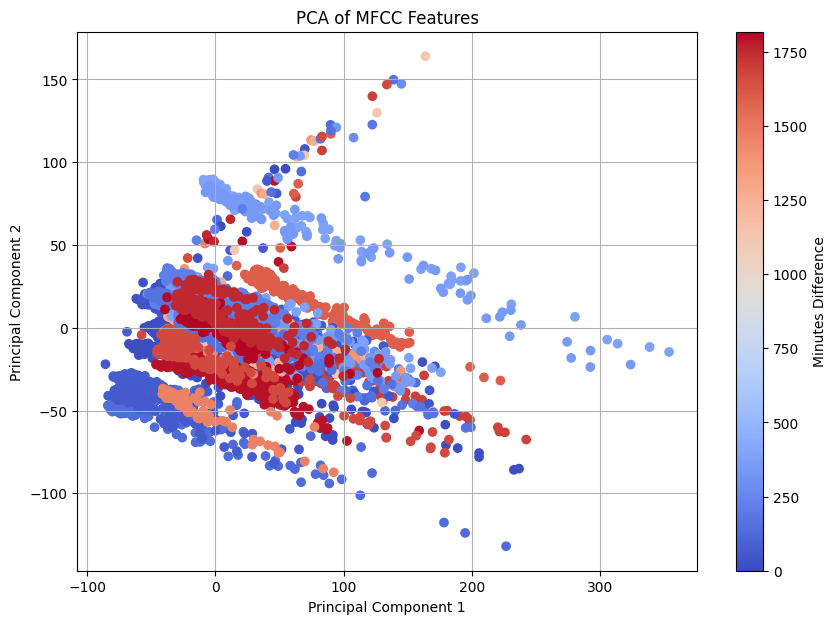

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T  # フレームごとのMFCCをそのまま返す

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                label = f"(None)"
                minutes_difference = None

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=(max_minutes_difference))
    cmap = plt.colormaps['coolwarm']  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.extend([color] * len(mfcc_list[-1]))  # 各フレームに同じ色を割り当てる

    # 全てのMFCCを縦に結合
    mfcc_features = np.vstack(mfcc_list)

    return mfcc_features, labels, colors, norm, cmap

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors)

# プロットにラベルを追加
# for i, label in enumerate(labels):
#     plt.annotate(label, (mfcc_pca[i * len(mfcc_list[i]), 0], mfcc_pca[i * len(mfcc_list[i]), 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')
plt.show()


[[-7.14084387e-01 -6.02819860e-01 -3.83539379e-01  5.19308448e-01
   9.97287929e-01  8.34611237e-01  5.78604043e-01  8.26438963e-02
  -2.13748366e-01 -7.65669495e-02  4.33208719e-02  2.00869083e-01
   5.90677738e-01 -9.09037054e-01 -5.74646950e-01  4.66943651e-01
  -9.20986474e-01 -7.39364147e-01 -3.11604470e-01  3.09076101e-01
   5.71412742e-01 -1.21319473e-01 -9.64712679e-01 -5.12789249e-01
  -2.56282866e-01 -6.65947020e-01]
 [-5.72189689e-01 -1.36395180e+00 -8.96883070e-01  4.42661703e-01
   7.54034519e-01  8.53255093e-01  1.11469340e+00  7.20868587e-01
  -2.90138751e-01 -3.72596115e-01 -2.06019640e-01 -2.85883367e-01
   1.48561791e-01 -5.72272480e-01 -1.89598441e-01  1.12826872e+00
  -8.21589351e-01 -1.01934397e+00 -2.04792351e-01  6.15612924e-01
   8.33052218e-01  5.90876155e-02 -9.44080770e-01 -2.57583380e-01
  -8.72473419e-02 -6.92507744e-01]
 [-8.19296539e-01 -1.34809494e+00 -1.29186845e+00 -7.70627614e-03
   6.37161911e-01  9.06457603e-01  1.08071542e+00  5.60341656e-01
  -3.6

<ipython-input-1-8a5dc94d44f5>:102: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')


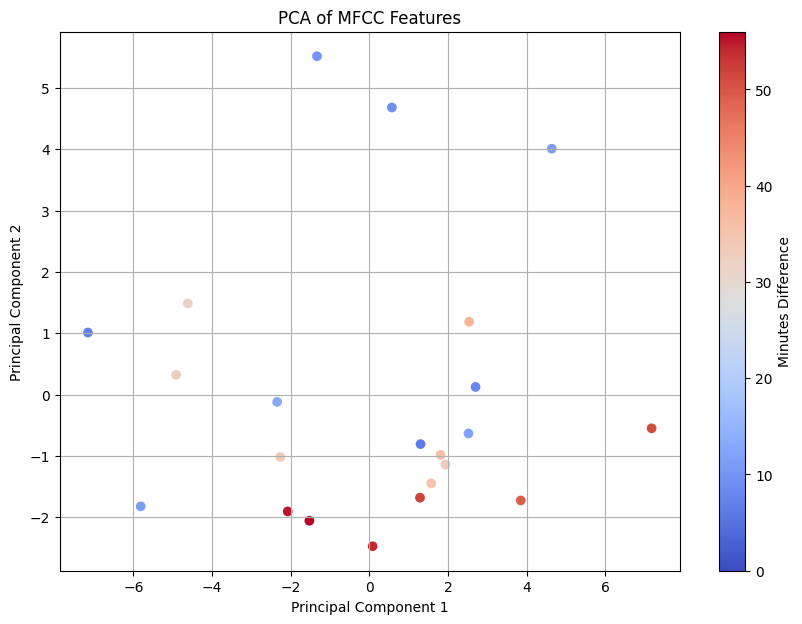

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359','5_31_2144','6_1_1806','6_2_1505','6_4_1500','6_5_1842','6_7_1602','6_21_1905','6_23_0132','7_3_1833','7_4_1049','7_5_0306']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc_features(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfccs.T, axis=0)
    mfcc_std = np.std(mfccs.T, axis=0)
    return mfcc_mean, mfcc_std

def process_directory(directory, specified_times):
    mfcc_mean_list = []
    mfcc_var_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    max_minutes_difference = 0
    file_infos = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                if minutes_difference > 60:
                    continue  # 60分以上のデータは無視する
                # ラベルを作成
                label = f" ({minutes_difference}min.)"
                max_minutes_difference = max(max_minutes_difference, minutes_difference)
            else:
                continue  # 近い将来の時間が見つからない場合は無視する

            mfcc_mean, mfcc_var = extract_mfcc_features(file_path)
            mfcc_mean_list.append(mfcc_mean)
            mfcc_var_list.append(mfcc_var)
            labels.append(label)
            file_infos.append((label, minutes_difference))

    # 各特徴量をフレームごとに標準化
    scaler_mean = StandardScaler()
    scaler_std = StandardScaler()
    mfcc_mean_normalized = scaler_mean.fit_transform(np.array(mfcc_mean_list))
    mfcc_std_normalized = scaler_std.fit_transform(np.array(mfcc_var_list))

    # 平均と標準偏差を結合
    mfcc_features_normalized = np.concatenate((mfcc_mean_normalized, mfcc_std_normalized), axis=1)
    print(mfcc_features_normalized)

    # 色を設定（ヒートマップ）
    norm = mcolors.Normalize(vmin=0, vmax=max_minutes_difference)
    cmap = plt.cm.coolwarm  # 色マップを選択
    for label, minutes_difference in file_infos:
        if minutes_difference is None:
            color = 'black'
        else:
            color = cmap(norm(minutes_difference))
        colors.append(color)

    return mfcc_features_normalized, labels, colors, norm, cmap, file_infos

# MFCCを抽出
mfcc_features, labels, colors, norm, cmap, file_infos = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca_normalized = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca_normalized[:, 0], mfcc_pca_normalized[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Minutes Difference')

plt.show()
